# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
from collections import Counter

# Data

In [3]:
data = pd.read_csv('Sequences.csv')

In [4]:
data.head()

,Sequence,Length,Solved,r10,r9,r8,r7,r6,r5,r4,...,p5,p4,p3,p2,p1,t-s,t-p,t-d,t-py,misc
0,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",57,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",41,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",20,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[1, 111, 12211, 1343211, 147753211, 1625285321...",12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data['Sequence'] = data['Sequence'].progress_apply(eval)

In [6]:
data['Sequence'][0]

[1,
 3,
 13,
 87,
 1053,
 28576,
 2141733,
 508147108,
 402135275365,
 1073376057490373,
 9700385489355970183,
 298434346895322960005291,
 31479360095907908092817694945,
 11474377948948020660089085281068730]

# Unit Sequences

In [7]:
def checkUnit(seq):
    return len(set(seq)) == 1

In [8]:
def predictNextTerm_Unit(seq):
    return seq[0]


Solved: 35 (0.02%)


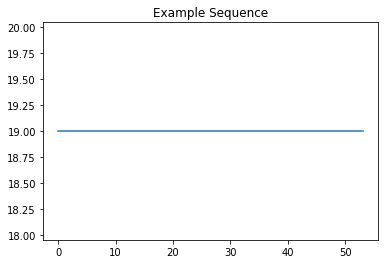

In [9]:
count = 0
data['misc'] = 0
for i in trange(len(data['Sequence'])):
    seq = data['Sequence'][i]
    if checkUnit(seq):
        count += 1
        data.loc[i, 'Solved'] = 1
        data.loc[i, 'misc'] = 1
        if count == 1:
            plt.plot(seq)
            plt.title('Example Sequence')

print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

# Sequences with Sum of Digits as difference

In [10]:
def sod(n):
    s = 0
    for d in str(n):
        s += int(d)
    return s

def checkSeq_sod(seq):
    if min(seq) >= 0: 
        for i in range(1,len(seq)):
            if seq[i] != seq[i-1]+sod(seq[i-1]):
                return False
        return True
    return False

In [11]:
def predictNextTerm_Seq_sod(seq):
    return seq[-1] + sod(seq[-1])


Solved: 17 (0.01%)


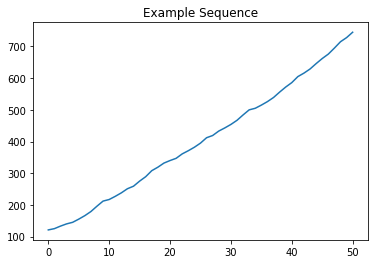

In [12]:
count = 0
data['misc'] = 0
for i in trange(len(data['Sequence'])):
    seq = data['Sequence'][i]
    if checkSeq_sod(seq):
        count += 1
        data.loc[i, 'Solved'] = 1
        data.loc[i, 'misc'] = 1
        if count == 1:
            plt.plot(seq)
            plt.title('Example Sequence')

print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

# Mode Fallback

In [13]:
def checkModeFallback(seq):
    c = Counter(seq)
    mode = c.most_common(1)[0][0]
    return mode == seq[-1]

In [14]:
def predictNextTerm_ModeFallback(seq):
    c = Counter(seq)
    return c.most_common(1)[0][0]


Solved: 14254 (6.33%)


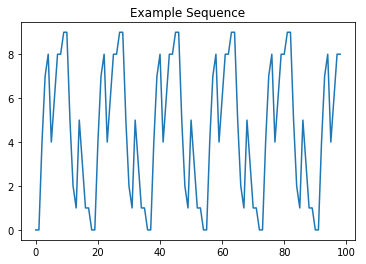

In [15]:
count = 0
data['misc'] = 0
for i in trange(len(data['Sequence'])):
    seq = data['Sequence'][i]
    if checkModeFallback(seq):
        count += 1
        data.loc[i, 'Solved'] = 1
        data.loc[i, 'misc'] = 1
        if count == 1:
            plt.plot(seq)
            plt.title('Example Sequence')

print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

# Final Standings

In [16]:
data.drop(['Sequence', 'Length'], axis=1).mean(0).mul(100).round(2).astype(str) + '%'

Solved    34.66%
r10        7.89%
r9         9.34%
r8        10.28%
r7        10.05%
r6         9.06%
r5         8.13%
r4         7.62%
r3         6.68%
r2         4.18%
r1         0.74%
p10        2.08%
p9         2.13%
p8         2.13%
p7         2.09%
p6         2.05%
p5         1.86%
p4          1.7%
p3         1.44%
p2         1.12%
p1         0.56%
t-s        0.23%
t-p        0.17%
t-d        0.05%
t-py       0.04%
misc       6.33%
dtype: object

In [17]:
data.to_csv('Sequences.csv', index=False)